In [2]:
import pandas as pd
df=pd.read_csv('C:\\Users\\ndurg\\OneDrive\\Documents\\internship\\Flight_Price\\Flight_Ticket_Participant_Datasets\\Data_Train.csv')
df.head().T

,0,1,2,3,4
Airline,IndiGo,Air India,Jet Airways,IndiGo,IndiGo
Date_of_Journey,24/03/2019,1/05/2019,9/06/2019,12/05/2019,01/03/2019
Source,Banglore,Kolkata,Delhi,Kolkata,Banglore
Destination,New Delhi,Banglore,Cochin,Banglore,New Delhi
Route,BLR ? DEL,CCU ? IXR ? BBI ? BLR,DEL ? LKO ? BOM ? COK,CCU ? NAG ? BLR,BLR ? NAG ? DEL
Dep_Time,22:20,05:50,09:25,18:05,16:50
Arrival_Time,01:10 22 Mar,13:15,04:25 10 Jun,23:30,21:35
Duration,2h 50m,7h 25m,19h,5h 25m,4h 45m
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop
Additional_Info,No info,No info,No info,No info,No info


In [3]:
df.info()   #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.shape

(10683, 11)

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion-----------------
dt.day method will extract only day of that date-----------------
dt.month method will extract only month of that date

In [8]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [9]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [10]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [12]:
df.head(3).T

,0,1,2
Airline,IndiGo,Air India,Jet Airways
Date_of_Journey,2019-03-24 00:00:00,2019-01-05 00:00:00,2019-09-06 00:00:00
Source,Banglore,Kolkata,Delhi
Destination,New Delhi,Banglore,Cochin
Route,BLR ? DEL,CCU ? IXR ? BBI ? BLR,DEL ? LKO ? BOM ? COK
Dep_Time,2022-07-21 22:20:00,2022-07-21 05:50:00,2022-07-21 09:25:00
Arrival_Time,2022-03-22 01:10:00,2022-07-21 13:15:00,2022-06-10 04:25:00
Duration,2h 50m,7h 25m,19h
Total_Stops,non-stop,2 stops,2 stops
Additional_Info,No info,No info,No info


Now ,we extract day and month from Date_of_journey and stored in 2 other columns.
Then there will be no use of 'Date_of_Journey' column,so we drop it.

In [13]:
df.drop('Date_of_Journey', axis=1, inplace=True)

From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns

In [14]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [15]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [16]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [17]:
df.head(3).T

,0,1,2
Airline,IndiGo,Air India,Jet Airways
Source,Banglore,Kolkata,Delhi
Destination,New Delhi,Banglore,Cochin
Route,BLR ? DEL,CCU ? IXR ? BBI ? BLR,DEL ? LKO ? BOM ? COK
Duration,2h 50m,7h 25m,19h
Total_Stops,non-stop,2 stops,2 stops
Additional_Info,No info,No info,No info
Price,3897,7662,13882
journey_day,24,5,6
journey_month,3,1,9


Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [18]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [19]:
df['Duration']=duration

In [20]:
df.head(5).T

,0,1,2,3,4
Airline,IndiGo,Air India,Jet Airways,IndiGo,IndiGo
Source,Banglore,Kolkata,Delhi,Kolkata,Banglore
Destination,New Delhi,Banglore,Cochin,Banglore,New Delhi
Route,BLR ? DEL,CCU ? IXR ? BBI ? BLR,DEL ? LKO ? BOM ? COK,CCU ? NAG ? BLR,BLR ? NAG ? DEL
Duration,2h 50m,7h 25m,19h 0m,5h 25m,4h 45m
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop
Additional_Info,No info,No info,No info,No info,No info
Price,3897,7662,13882,6218,13302
journey_day,24,5,6,5,3
journey_month,3,1,9,12,1


In [21]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [22]:
df['dur_hour']=df['Duration'].apply(hour)

In [23]:
df['dur_min']=df['Duration'].apply(minutes)

In [24]:
df.head(5).T

,0,1,2,3,4
Airline,IndiGo,Air India,Jet Airways,IndiGo,IndiGo
Source,Banglore,Kolkata,Delhi,Kolkata,Banglore
Destination,New Delhi,Banglore,Cochin,Banglore,New Delhi
Route,BLR ? DEL,CCU ? IXR ? BBI ? BLR,DEL ? LKO ? BOM ? COK,CCU ? NAG ? BLR,BLR ? NAG ? DEL
Duration,2h 50m,7h 25m,19h 0m,5h 25m,4h 45m
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop
Additional_Info,No info,No info,No info,No info,No info
Price,3897,7662,13882,6218,13302
journey_day,24,5,6,5,3
journey_month,3,1,9,12,1


In [25]:
drop_col(df,'Duration')

In [26]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [27]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [28]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

In [29]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [30]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

We are using two main Encoding Techniques to covert Categorical data into some numerical format
Nominal data -- Data that are not in any order -->one hot encoding
ordinal data -- Data are in order --> labelEncoder

In [31]:
categorical = df[column]

In [32]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info


In [33]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

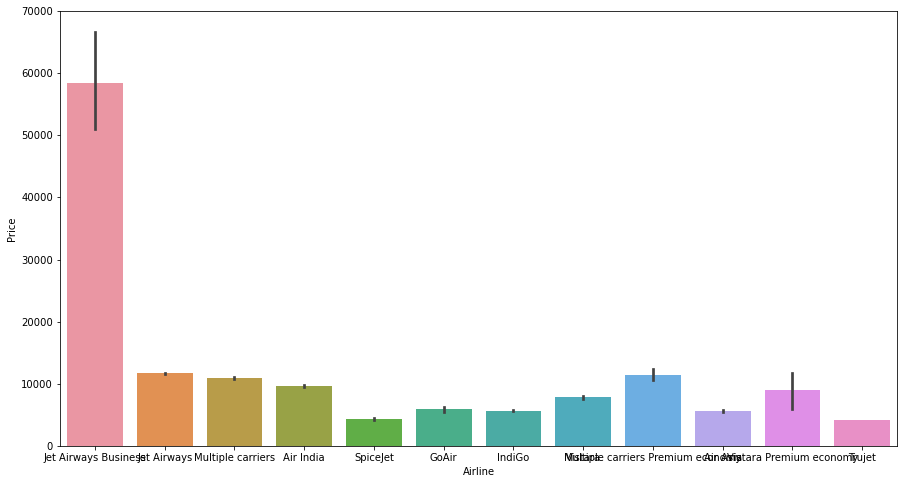

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

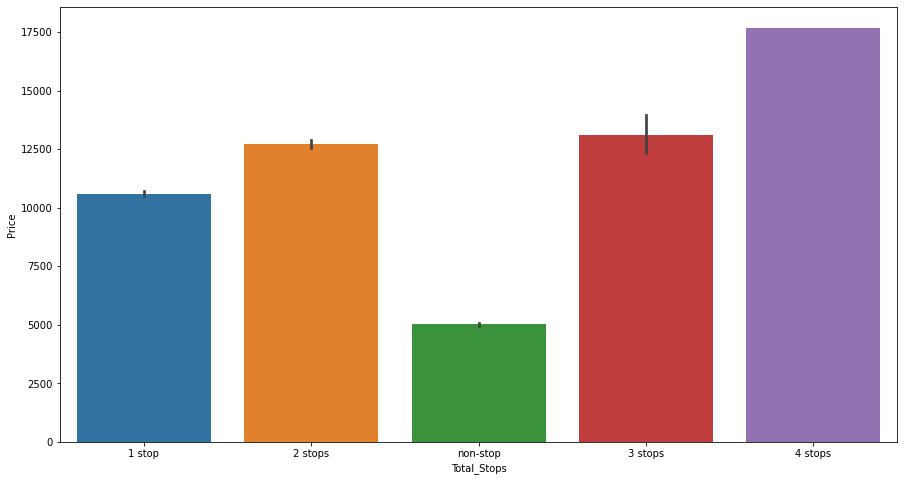

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [36]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [37]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [38]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x1080 with 0 Axes>

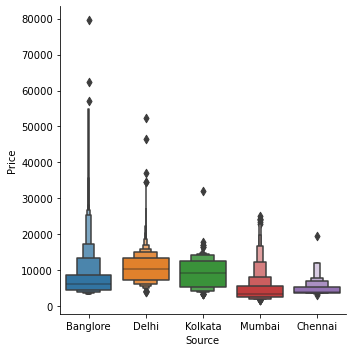

In [40]:
plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [41]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [42]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

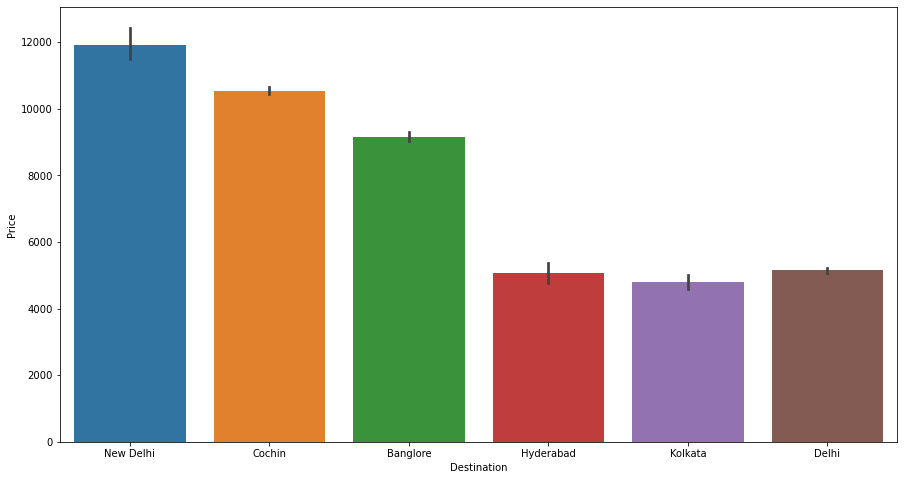

In [44]:
plt.figure(figsize=(15,8))
sns.barplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [45]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [46]:
# now work on route column
categorical['Route'].value_counts()

DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64

In [47]:
categorical['Route1']=categorical['Route'].str.split('?').str[0]
categorical['Route2']=categorical['Route'].str.split('?').str[1]
categorical['Route3']=categorical['Route'].str.split('?').str[2]
categorical['Route4']=categorical['Route'].str.split('?').str[3]
categorical['Route5']=categorical['Route'].str.split('?').str[4]

In [48]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [49]:
drop_col(categorical,'Route')

In [50]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [51]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [52]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [53]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [54]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='Price'>

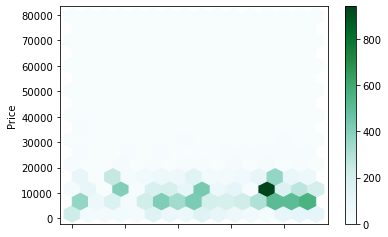

In [55]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [56]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [57]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [58]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [59]:
drop_col(categorical,'Additional_Info')

In [60]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [61]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [62]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [63]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

Our data is ready for the modeling

In [64]:
f_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [65]:
f_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [66]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

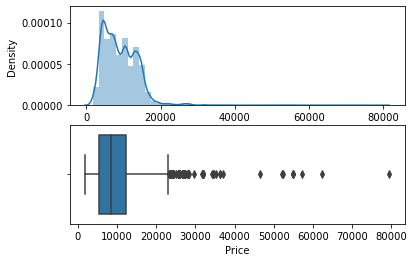

In [67]:
plot(f_df,'Price')

As there is some outliers in price feature,so we replace it with median.

In [69]:
f_df['Price']=np.where(f_df['Price']>=40000,f_df['Price'].median(),f_df['Price'])

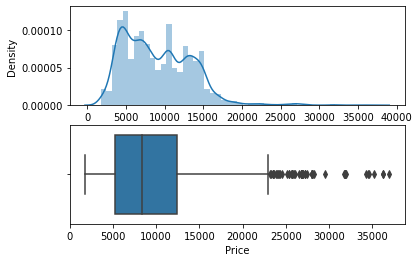

In [70]:
plot(f_df,'Price')

In [72]:
x=f_df.drop('Price',axis=1)
y=f_df['Price']

In [73]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=9)

In [74]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9515829193196614
Predictions are: [13490.39        8117.68833333  4573.52       ...  6582.4475
  4937.13        4100.14533333]


r2 score is: 0.8401316004758672
MAE:1114.84695269663
MSE:3134717.256308373
RMSE:1770.5132748184558


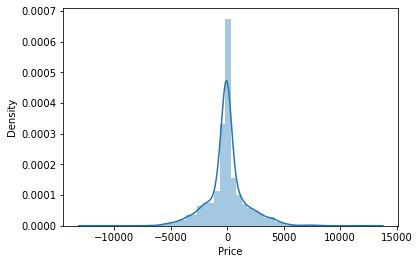

In [76]:
predict(RandomForestRegressor())

Model is: LogisticRegression()
Training score: 0.3509654768870685
Predictions are: [13591. 13377.  4804. ...  7229.  5228.  4409.]


r2 score is: 0.46669924140624286
MAE:1971.4688816097332
MSE:10457020.247543285
RMSE:3233.7316288683087


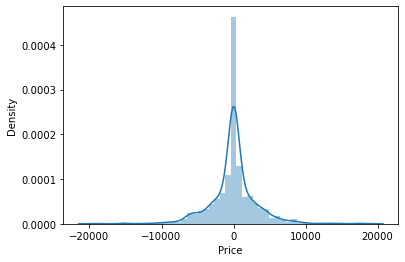

In [77]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7822440834722775
Predictions are: [12635.2  9277.   4678.  ...  6830.4  5326.2  4102.8]


r2 score is: 0.6543146996687678
MAE:1717.9605989705194
MSE:6778235.595189519
RMSE:2603.504483420284


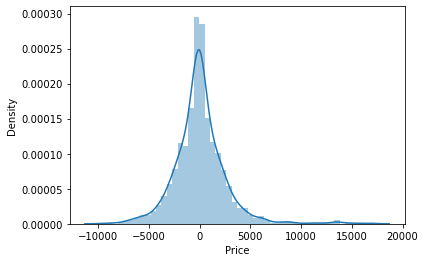

In [78]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9664762083695866
Predictions are: [12835.  8073.  4804. ...  7229.  4441.  4384.]


r2 score is: 0.7418302602876016
MAE:1259.2493760723755
MSE:5062220.804999869
RMSE:2249.9379558111973


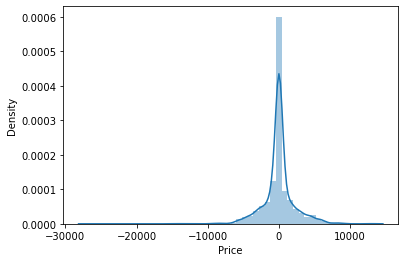

In [79]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.0474625233963607
Predictions are: [8530.96779649 8388.89543606 7880.24215081 ... 7862.10323087 7874.16161324
 7865.10509109]


r2 score is: 0.0457059587706683
MAE:3420.0467570845544
MSE:18711903.087403268
RMSE:4325.725729562991


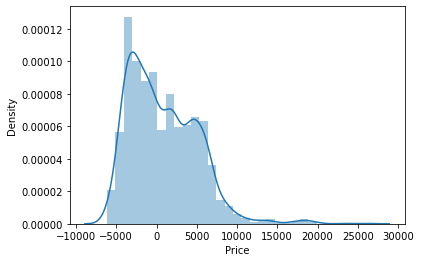

In [80]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.7995169816570971
Predictions are: [12292.02265946 10622.57660337  4632.33577211 ...  6279.38549238
  4955.28192511  4758.13593096]


r2 score is: 0.8112782539421453
MAE:1422.1336689082345
MSE:3700476.865779226
RMSE:1923.6623575303506


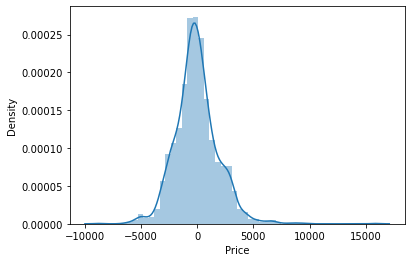

In [81]:
predict(GradientBoostingRegressor())

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [85]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(x_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 180, 'max_features': 'auto', 'max_depth': 10}

In [86]:
# best parameter
rf_random.best_params_

{'n_estimators': 180, 'max_features': 'auto', 'max_depth': 10}

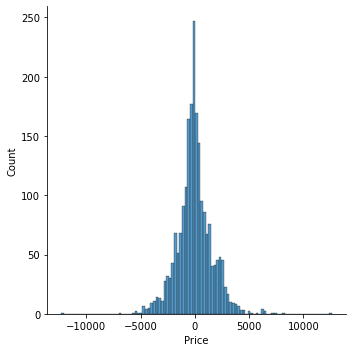

In [87]:
#predicting the values
prediction = rf_random.predict(x_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [88]:
r2_score(y_test,prediction)

0.8626857787365642

In [89]:
from sklearn.feature_selection import mutual_info_classif

In [90]:
mutual_info_classif(x,y)

array([2.1292829 , 2.05790932, 2.83706266, 2.25150342, 1.50721945,
       0.68248443, 0.76945085, 0.09882431, 0.68331669, 0.90738281,
       0.        , 0.56195407, 0.01229638, 0.31410167, 0.        ,
       0.2251246 , 0.00895544, 0.1665941 , 1.55496812, 0.90406107,
       0.30500307, 1.52278405, 0.40529759, 0.28625985, 0.17241591,
       0.3621745 , 1.09363886, 0.84723772, 1.41494285, 1.21136278,
       1.83610215, 1.50924841, 1.76457254, 1.06090766])

In [91]:
imp = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp

,0
Total_Stops,2.178143
Route1,2.051348
Route2,2.839178
Route3,2.254399
Route4,1.479364
Route5,0.644615
Air India,0.751148
GoAir,0.095135
IndiGo,0.664485
Jet Airways,0.899245


In [ ]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.